# Selección de cripto activos para una cartera de inversión

![picture](https://drive.google.com/uc?export=view&id=1ihM3JEKP-XPaoX9b5bwymu_IF4ntTlz-)

# Trabajo Práctico 3 -  Aprendizaje Supervisado

# Introducción

Una tarea fundamental en el modelado financiero es la predicción del comportamiento de los precios en un futuro cercano. Usando la serie de precios histórica de los activos como datos de entrenamiento, deseamos predecir si el precio subirá o no, y en qué medida, es decir, nos interesa también el rendimiento.

La predicción de retornos de criptoactivos es un gran desafío para la comunidad de aprendizaje automático debido a la alta volatilidad de los activos, la manipulación del mercado y la naturaleza no estacionaria de los datos, entre otras cuestiones.  

En este práctico aplicaremos algunas técnicas de aprendizaje automático supervisado para predecir el movimiento de activos, a partir de los features que hemos trabajado en el práctico anterior. Exploraremos modelos simples de regresión y clasificación. Para validar los modelos procedemos a evaluar su bondad de ajuste, es decir, que "tan bueno" es el poder predictivo del modelo y comparar su desempeño.

📌 **Conjunto de Entrenamiento y Test**

Para entrenar modelos de ML y seleccionar el más adecuado, debemos particionar los datos en conjuntos de entrenamiento y test (o entrenamiento, validación y test). Si bien la práctica más habitual es seleccionar estos conjuntos al azar, esta metodología no es conveniente cuando trabajamos con series de tiempo, ya que romper la estructura de los datos significa romper la autocorrelación, que es lo que da sentido al análisis. Frente a esto, una posibilidad es realizar la división de datos a partir del procedimiento [Walk-Forward Validation](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/), otra es implementar lo que se conoce como [timeSeriesSplit](https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split).

¡Los invito a indagar sobre estas metodologías!


📌 **Variables Predictoras**

Los predictores son datos que consideramos relevantes para el comportamiento del mercado. En nuestro caso, trabajaremos con los indicadores técnicos calculados en el trabajo práctico anterior y algunos que sumaremos al análisis, pero estos pueden ser muy diversos, como datos de sentimiento, datos de amplitud, datos básicos, gubernamentales, etc., que nos ayudarán a hacer nuestras predicciones. 



📌 **Modelo Baseline**

Establecer un baseline es esencial para cualquier problema de predicción. Este modelo nos brinda un punto de comparación, nos da una idea de cuan bien otros modelos rindieron en el problema en cuestión.

Si la performance de un modelo no alcanza o es similiar a la del baseline, entonces debemos seguir trabajando para mejorar el modelo u optar por algún otro. Nuestro baseline debe ser fácil de implementar y naive. 


Algunas opciones simples para baseline: [link](https://medium.com/analytics-vidhya/benchmarking-methods-for-deep-learning-based-time-series-forecast-ec45f78b61e2).

# 📖 ¡Actividades!

En este práctico evaluaremos el potencial de modelos predictivos simples sobre algunos activos. Esta será la base para construir una canasta de activos con riesgo controlado. 

**Objetivo: predecir el movimiento del precio de cada activo para los próximos n días (tomaremos n=1, n=7)**

## Parte 0 - Feature Engineer

Los invito a explorar y agregar otras características además de las trabajadas anteriormente. Como en el práctico pasado, pueden usar la librería talib o calcularlos ustedes.

- [Indicadores técnicos](https://coinmarketcap.com/alexandria/article/technical-analysis-101-the-best-technical-indicators-for-crypto-and-stocks)
- [Indicadores técnicos en python](https://towardsdatascience.com/building-a-comprehensive-set-of-technical-indicators-in-python-for-quantitative-trading-8d98751b5fb)

## Parte I - Clasificación

Por ahora nos concentraremos en predecir si el precio del activo subirá o bajará (es decir, si el retorno a n días será positivo o negativo). Para ello entrenaremos algunos modelos de clasificación.

- DecisionTreeClassifier
- RandomForestClassifier
- XGBClassifier

En este caso, podemos definir nuestro target como 1 o 0:

- Si el rendimiento a n días fue positivo el target tomará el valor 1.
- Si el rendimiento a n días fue negativo o cero el target tomará el valor 0.

Utilicen métricas adecuadas para la evaluación de los modelos (accuracy, recall, precision, etc) 


## Parte II - Regresión

Ahora nuestro objetivo es implementar modelos sobre los activos para predecir su tasa de cambio (ya sea respecto al precio open o close). Consideren los modelos de regresión:

- Desicion tree
- Randon Forest
- XGBoost


Evalúen los resultados, con algunas métricas útiles, tales como Error Cuadrático Medio (RMSE) y el Error Absoluto Medio (MAE). ¿Qué pueden decir?


### ¡Para tener en cuenta!

- Para los modelos de regresión y clasificación elijan un modelo baseline.
- Definir periodos de entrenamiento y test: utilizar librerías adecuadas para series de tiempo.
- Dado el periodo de entrenamiento, chequeen si los datos están balaceados.  
- Analicen la necesidad de estandarizar los datos, según los modelos empleados.
- Ajuste de hiperparámetros de los modelos: dado que los parámetros pueden tomar valores en un amplio rango es recomendable uilizar GridSearchCV. 



## Opcional - Predicción usando Long short-term memory (LSTM)

Las redes de este tipo son adecuadas para clasificar, procesar y hacer predicciones basadas en datos de series temporales, ya que pueden almacenar información pasada. Esto es importante en nuestro caso porque el precio anterior de una acción es crucial para predecir su precio futuro.

Comparen la performance de los modelos anteriores (regresión y/o clasificación) con una red neuronal recurrente (LSTM). 

# Fecha de entrega

- __Versión preliminar: 29/7__ 

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

In [ ]:
import pandas as pd
import numpy as np
import math

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from pylab import rcParams
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

from pandas import Series, DataFrame

import seaborn as sns
import os
import time
import missingno as msno

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import ParameterGrid

import xgboost as xgb

import talib as ta
import datetime as dt

import warnings
warnings.filterwarnings("ignore") 

In [ ]:
df = pd.read_csv('../2tp_analisisYCuracion/Activos limpios con features - 2tp.csv', index_col = 'Fecha')

In [ ]:
df.head()

,open,high,low,close,volume,active,day,month,year,weekday,...,ADX200,STOCH_SLOWK,STOCH_SLOWD,MACD,SMA_5,SMA_15,SMA_ratio,SMA5_Volume,SMA15_Volume,SMA_Volume_Ratio
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-01-01 03:00:00,0.34640,0.35368,0.34617,0.35073,5.565085e+06,XRPUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,130.72000,134.00000,130.71000,133.36000,4.847789e+04,ETHUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,2.52060,2.56000,2.52040,2.53830,4.744196e+05,EOSUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,0.03988,0.04068,0.03985,0.04061,1.281178e+07,ADAUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,29.73000,30.16000,29.57000,30.12000,1.034450e+04,LTCUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'active', 'day', 'month',
       'year', 'weekday', 'profit', 'real_volume', 'EMA5', 'EMA15', 'EMA50',
       'EMA100', 'EMA200', 'RSI5', 'RSI15', 'RSI50', 'RSI100', 'RSI200',
       'ADX5', 'ADX15', 'ADX50', 'ADX100', 'ADX200', 'STOCH_SLOWK',
       'STOCH_SLOWD', 'MACD', 'SMA_5', 'SMA_15', 'SMA_ratio', 'SMA5_Volume',
       'SMA15_Volume', 'SMA_Volume_Ratio'],
      dtype='object')

In [ ]:
df.drop(columns=['EMA5', 'EMA15', 'EMA50',
       'EMA100', 'EMA200', 'RSI5', 'RSI15', 'RSI50', 'RSI100', 'RSI200',
       'ADX5', 'ADX15', 'ADX50', 'ADX100', 'ADX200', 'STOCH_SLOWK',
       'STOCH_SLOWD', 'MACD', 'SMA_5', 'SMA_15', 'SMA_ratio', 'SMA5_Volume',
       'SMA15_Volume', 'SMA_Volume_Ratio'], inplace=True)

## Parte 0 - Feature Engineer

### Funciones

In [ ]:
def _extract_close(data, active):
    values = None

    if isinstance(data, Series):
        values = data.values
    else:
        if "close" in data.columns:
            values = data[data['active'] == active]['close']

    if values is None:
        raise ValueError(
            "data must be Pandas Series or DataFrame with a 'last' or 'close' column")

    return values

In [ ]:
def _extract_high(data, active):
    values = None

    if isinstance(data, Series):
        values = data.values
    else:
        if "high" in data.columns:
            values = data[data['active'] == active]['high']

    if values is None:
        raise ValueError(
            "data must be Pandas Series or DataFrame with a 'last' or 'close' column")

    return values

In [ ]:
def _extract_low(data, active):
    values = None

    if isinstance(data, Series):
        values = data.values
    else:
        if "low" in data.columns:
            values = data[data['active'] == active]['low']

    if values is None:
        raise ValueError(
            "data must be Pandas Series or DataFrame with a 'last' or 'close' column")

    return values

In [ ]:
def STOCHRSI(data, active):
    closing_prices = _extract_close(data, active)
    return ta.STOCHRSI(closing_prices) 

In [ ]:
def EMA(data, period, active):
    closing_prices = _extract_close(data, active)
    return ta.EMA(closing_prices, period)

In [ ]:
def RSI(data, period, active):
    closing_prices = _extract_close(data, active)
    return ta.RSI(closing_prices, period)

In [ ]:
def ADX(data, period, active):
    closing_prices = _extract_close(data, active)
    high_prices = _extract_high(data, active)
    low_prices = _extract_low(data, active)
    return ta.ADX(high_prices, low_prices, closing_prices, period)

In [ ]:
def MACD(data, active, fastperiod = 12, slowperiod = 26, signalperiod  = 9):
    closing_prices = _extract_close(data, active)
    return ta.MACD(closing_prices, fastperiod, slowperiod, signalperiod)[0]

In [ ]:
def STOCH(data, active):
    closing_prices = _extract_close(data, active)
    high_prices = _extract_high(data, active)
    low_prices = _extract_low(data, active)
    return ta.STOCH(high_prices, low_prices, closing_prices)

In [ ]:
def add_target_n_steps(data, periods):
    target = data.shift(-periods).apply(lambda x: x.iloc[0])['close']
    return target

## Parte I - Clasificación

In [ ]:
df.isna().sum(), df.shape, (df.isna().sum().max()/df.shape[0])*100

(open           0
 high           0
 low            0
 close          0
 volume         0
 active         0
 day            0
 month          0
 year           0
 weekday        0
 profit         0
 real_volume    0
 dtype: int64,
 (116029, 12),
 0.0)

Vemos que los valores nulos corresponden a los indicadores técnicos que agregamos como features para ser usados luego en los modelos que vamos a utilizar, por lo tanto corresponde eliminar estos valores nulos para poder tener el dataset limpio y completo.

df[df.active == 'BTCUSDT']Creamos un nuevo dataset unicamente con la información de BTC, para poder usarlo a modo de ejemplo con los modelos de clasificación que vamos a utilizar. A su vez, quitaremos los valores nulos usando la columna "ADX200", que al ser la que mayor cantidad de nulos tiene, nos aseguramos de que el dataset quede completo.

In [ ]:
df_btc = df[df.active == 'BTCUSDT']

In [ ]:
df_btc_bkp = df_btc.copy()

### Generamos el target que usaremos luego en cada modelo y el baseline

In [ ]:
df_btc_close = df_btc[['close']]
df_btc_close = df_btc_close.rename(columns = {'close':'actual_close'})

#### Predicción a 1 día (6 períodos)

In [ ]:
df_btc_close['target_1'] = df_btc.rolling(6).apply(lambda x: x.iloc[1] > x.iloc[0])['close']
df_btc_close.head()

,actual_close,target_1
Fecha,,
2019-01-01 03:00:00,3703.56,NaN
2019-01-01 07:00:00,3713.07,NaN
2019-01-01 11:00:00,3698.53,NaN
2019-01-01 15:00:00,3659.41,NaN
2019-01-01 19:00:00,3711.20,NaN


#### Predicción a 7 dias (42 períodos)

In [ ]:
df_btc_close['target_2'] = df_btc.rolling(42).apply(lambda x: x.iloc[1] > x.iloc[0])['close']
df_btc_close.head()

,actual_close,target_1,target_2
Fecha,,,
2019-01-01 03:00:00,3703.56,NaN,NaN
2019-01-01 07:00:00,3713.07,NaN,NaN
2019-01-01 11:00:00,3698.53,NaN,NaN
2019-01-01 15:00:00,3659.41,NaN,NaN
2019-01-01 19:00:00,3711.20,NaN,NaN


Tomamos unicamente estas columnas para ver si un modelo de clasificacion con parametros estandar y con unicamente estas features, logra mejorar el accuracy del modelo baseline.

In [ ]:
predictors = ["close", "volume", "open", "high", "low"]
df_btc = df_btc_close.join(df_btc[predictors]).iloc[1:]
df_btc.head()

,actual_close,target_1,target_2,close,volume,open,high,low
Fecha,,,,,,,,
2019-01-01 07:00:00,3713.07,NaN,NaN,3713.07,3200.719832,3703.63,3732.00,3696.14
2019-01-01 11:00:00,3698.53,NaN,NaN,3698.53,3324.094679,3713.07,3756.94,3684.21
2019-01-01 15:00:00,3659.41,NaN,NaN,3659.41,3089.291395,3698.28,3701.68,3642.00
2019-01-01 19:00:00,3711.20,NaN,NaN,3711.20,4906.805931,3659.56,3730.01,3659.56
2019-01-01 23:00:00,3783.28,1.0,NaN,3783.28,7404.855783,3712.85,3810.16,3706.43


In [ ]:
df_btc.dropna(subset=['target_2'], inplace=True)
df_btc.head()

,actual_close,target_1,target_2,close,volume,open,high,low
Fecha,,,,,,,,
2019-01-07 23:00:00,3949.16,0.0,1.0,3949.16,4988.212097,3965.61,3989.00,3922.00
2019-01-08 03:00:00,3958.56,1.0,0.0,3958.56,4541.881427,3949.00,3965.66,3936.26
2019-01-08 07:00:00,3980.69,0.0,0.0,3980.69,5296.687764,3959.59,3982.25,3946.09
2019-01-08 11:00:00,4008.81,0.0,1.0,4008.81,8556.470955,3981.81,4039.00,3967.93
2019-01-08 15:00:00,3968.46,0.0,1.0,3968.46,10830.599948,4008.81,4069.80,3938.82


### Modelo Baseline

In [ ]:
df_btc_bl = df_btc.copy()

In [ ]:
#Creación del Modelo Baseline que predice el precio a 6 periodos hacia adelante con el valor de la media de los útimos 10 periodos
df_btc_bl['precio_bl'] = df_btc_bl['close'].rolling(10).mean()

In [ ]:
df_btc_bl['precio_bl'] = df_btc_bl['precio_bl'].shift(6) #Hacemos el shift para predecir el precio 6 períodos hacia adelante

In [ ]:
df_btc_bl[['close','precio_bl']].head(15)

,close,precio_bl
Fecha,,
2019-01-07 23:00:00,3949.16,NaN
2019-01-08 03:00:00,3958.56,NaN
2019-01-08 07:00:00,3980.69,NaN
2019-01-08 11:00:00,4008.81,NaN
2019-01-08 15:00:00,3968.46,NaN
2019-01-08 19:00:00,3967.83,NaN
2019-01-08 23:00:00,3980.64,NaN
2019-01-09 03:00:00,3986.63,NaN
2019-01-09 07:00:00,3982.77,NaN


In [ ]:
df_btc_bl.dropna(subset=['close'], inplace=True)
df_btc_bl.dropna(subset=['precio_bl'], inplace=True)


In [ ]:
#Asignación de los valores Target de nuestro modelo Baseline
df_btc_bl['target_bl'] = df_btc_bl.apply(lambda x: 1 if x['precio_bl'] > x['close'] else 0, axis = 1)
df_btc_bl.head(7)

,actual_close,target_1,target_2,close,volume,open,high,low,precio_bl,target_bl
Fecha,,,,,,,,,,
2019-01-10 11:00:00,3726.32,0.0,1.0,3726.32,7358.792265,3735.46,3750.00,3707.07,3973.477,1
2019-01-10 15:00:00,3573.78,1.0,0.0,3573.78,13772.258973,3726.32,3735.65,3540.00,3975.699,1
2019-01-10 19:00:00,3583.43,0.0,1.0,3583.43,7085.099518,3573.78,3609.21,3540.33,3976.583,1
2019-01-10 23:00:00,3579.76,0.0,0.0,3579.76,6203.976654,3583.43,3617.04,3557.52,3976.614,1
2019-01-11 03:00:00,3584.48,0.0,0.0,3584.48,5800.097420,3579.78,3590.00,3546.36,3953.864,1
2019-01-11 07:00:00,3586.06,0.0,1.0,3586.06,6603.927942,3584.76,3635.00,3562.00,3930.663,1
2019-01-11 11:00:00,3598.72,1.0,1.0,3598.72,5715.699482,3586.45,3612.00,3569.16,3906.512,1


In [ ]:
df_btc_bl[['close','precio_bl','target_bl']].head(15)

,close,precio_bl,target_bl
Fecha,,,
2019-01-10 11:00:00,3726.32,3973.477,1
2019-01-10 15:00:00,3573.78,3975.699,1
2019-01-10 19:00:00,3583.43,3976.583,1
2019-01-10 23:00:00,3579.76,3976.614,1
2019-01-11 03:00:00,3584.48,3953.864,1
2019-01-11 07:00:00,3586.06,3930.663,1
2019-01-11 11:00:00,3598.72,3906.512,1
2019-01-11 15:00:00,3605.88,3865.826,1
2019-01-11 19:00:00,3578.85,3825.506,1


In [ ]:
df_btc_bl.target_bl.value_counts()

0    3888
1    3344
Name: target_bl, dtype: int64

In [ ]:
df_btc_bl.target_1.value_counts()

1.0    3718
0.0    3514
Name: target_1, dtype: int64

Vamos a probar con el modelo baseline, y dividimos los datos en 80/20 en train y test.

In [ ]:
train = df_btc_bl.iloc[:-1400]
test = df_btc_bl.iloc[-1400:]

In [ ]:
df_btc_bl.shape, train.shape, test.shape

((7232, 10), (5832, 10), (1400, 10))

In [ ]:
df_btc_bl.columns

Index(['actual_close', 'target_1', 'target_2', 'close', 'volume', 'open',
       'high', 'low', 'precio_bl', 'target_bl'],
      dtype='object')

In [ ]:
#Calculamos el score del modelo Baseline intentando predecir a 6 periodos

print('Precision del Modelo Baseline: ',
precision_score(test["target_1"], test["target_bl"]))
print('Accuracy del Modelo Baseline: ',
accuracy_score(test["target_1"], test["target_bl"]))
print('Recall del Modelo Baseline: ',
recall_score(test["target_1"], test["target_bl"]))
print('F1 del Modelo Baseline: ',
f1_score(test["target_1"], test["target_bl"]))

Precision del Modelo Baseline:  0.4152777777777778
Accuracy del Modelo Baseline:  0.4235714285714286
Recall del Modelo Baseline:  0.4364963503649635
F1 del Modelo Baseline:  0.42562277580071173


In [ ]:
#Calculamos el score del modelo Baseline intentando predecir a 42 periodos

print('Precision del Modelo Baseline: ',
precision_score(test["target_2"], test["target_bl"]))
print('Accuracy del Modelo Baseline: ',
accuracy_score(test["target_2"], test["target_bl"]))
print('Recall del Modelo Baseline: ',
recall_score(test["target_2"], test["target_bl"]))
print('F1 del Modelo Baseline: ',
f1_score(test["target_2"], test["target_bl"]))

Precision del Modelo Baseline:  0.49027777777777776
Accuracy del Modelo Baseline:  0.5
Recall del Modelo Baseline:  0.5145772594752187
F1 del Modelo Baseline:  0.5021337126600285


### XGboost, RandomForest y DecisionTree

In [ ]:
df_btc_prev = df_btc.copy()
df_btc_prev = df_btc_prev.shift(1)
df_btc_prev.dropna(inplace=True)
df_btc_prev.head()

,actual_close,target_1,target_2,close,volume,open,high,low
Fecha,,,,,,,,
2019-01-08 03:00:00,3949.16,0.0,1.0,3949.16,4988.212097,3965.61,3989.00,3922.00
2019-01-08 07:00:00,3958.56,1.0,0.0,3958.56,4541.881427,3949.00,3965.66,3936.26
2019-01-08 11:00:00,3980.69,0.0,0.0,3980.69,5296.687764,3959.59,3982.25,3946.09
2019-01-08 15:00:00,4008.81,0.0,1.0,4008.81,8556.470955,3981.81,4039.00,3967.93
2019-01-08 19:00:00,3968.46,0.0,1.0,3968.46,10830.599948,4008.81,4069.80,3938.82


<AxesSubplot:xlabel='Fecha'>

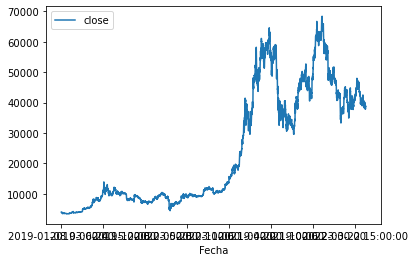

In [ ]:
df_btc_prev.plot.line(y="close", use_index=True)

Primero veremos si nuestro dataset está balanceado, esto es, analizar si la proporción entre 1 y 0 de nuestro target esta equilibrado, dado que si el dataset no está balanceado, puede que necesitemos realizar algún tipo de procesamiento previo al entrenamiento del modelo para poder solucionar este problema, o al menos dividir correctamente las clases en entrenamiento y test para evitar este desbalanceamiento.

In [ ]:
df_btc_prev.target_1.value_counts(), df_btc_prev.shape[0]

(1.0    3724
 0.0    3522
 Name: target_1, dtype: int64,
 7246)

In [ ]:
df_btc_prev.target_2.value_counts(), df_btc_prev.shape[0]

(1.0    3726
 0.0    3520
 Name: target_2, dtype: int64,
 7246)

Vemos que de un total de 6884 valores, 3531 son 1 y 3353 son 0, por lo que tenemos un dataset muy bien balanceado y no es necesario hacer algun procesamiento previo al entrenamiento del modelo. Vamos a entrenar dos modelos de clasificación y compararemos las métricas, uno es RandomForest y el otro es XGBoost.

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=42)
xgboost = xgb.XGBClassifier()

Como generamos muchas columnas, vamos a usar unicamente las que pertenecen a 5 períodos de análisis.

Luego generamos una variable "predictors" que contiene las features que usaremos para entrenar nuestro modelo, sin la variable target. Y para una primera iteración, entrenaremos un modelo con los últimos 100 datos del dataset.

In [ ]:
train = df_btc_bl.iloc[:-1400]
test = df_btc_bl.iloc[-1400:]

Predicciones a 6 periodos:

In [ ]:
predictors=['close', 'volume', 'open', 'high', 'low']

In [ ]:
random_forest.fit(train[predictors], train["target_1"])
preds = random_forest.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target_1"], preds)

0.49455337690631807

In [ ]:
xgboost.fit(train[predictors], train["target_1"])
preds = xgboost.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target_1"], preds)

0.49189814814814814

Predicciones a 42 periodos:

In [ ]:
random_forest.fit(train[predictors], train["target_2"])
preds = random_forest.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target_2"], preds)

0.4897435897435897

In [ ]:
xgboost.fit(train[predictors], train["target_2"])
preds = xgboost.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target_2"], preds)

0.48534201954397393

#### Agregamos indicadores técnicos para usarlos como features

In [ ]:
df_btc_exp = df_btc.copy()
df_btc_exp['active'] = 'BTCUSDT'
periodos = [6, 15, 20, 50, 100, 200]
for i in periodos:
    EMAi = "EMA" + str(i)
    RSIi = "RSI" + str(i)
    ADXi = "ADX" + str(i)
    df_btc_exp[EMAi] = EMA(df_btc_exp, i, "BTCUSDT")
    df_btc_exp[RSIi] = RSI(df_btc_exp, i, "BTCUSDT")
    df_btc_exp[ADXi] = ADX(df_btc_exp, i, "BTCUSDT")

df_btc_exp['STOCH_SLOWK'], df_btc_exp['STOCH_SLOWD'] = STOCH(df_btc_exp, 'BTCUSDT')
df_btc_exp['MACD'] = MACD(df_btc_exp, 'BTCUSDT')
df_btc_exp

,actual_close,target_1,target_2,close,volume,open,high,low,active,EMA6,...,ADX50,EMA100,RSI100,ADX100,EMA200,RSI200,ADX200,STOCH_SLOWK,STOCH_SLOWD,MACD
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-01-07 23:00:00,3949.16,0.0,1.0,3949.16,4988.212097,3965.61,3989.00,3922.00,BTCUSDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08 03:00:00,3958.56,1.0,0.0,3958.56,4541.881427,3949.00,3965.66,3936.26,BTCUSDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08 07:00:00,3980.69,0.0,0.0,3980.69,5296.687764,3959.59,3982.25,3946.09,BTCUSDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08 11:00:00,4008.81,0.0,1.0,4008.81,8556.470955,3981.81,4039.00,3967.93,BTCUSDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08 15:00:00,3968.46,0.0,1.0,3968.46,10830.599948,4008.81,4069.80,3938.82,BTCUSDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01 19:00:00,38306.63,1.0,0.0,38306.63,8032.850330,37934.90,38574.50,37686.26,BTCUSDT,38122.160672,...,15.307909,39817.838735,45.765216,8.805959,40762.199218,47.487617,4.949401,53.222672,51.194825,-345.127995
2022-05-01 23:00:00,38621.62,1.0,0.0,38621.62,7203.268160,38306.63,38810.73,38241.37,BTCUSDT,38264.863337,...,15.345128,39794.151235,46.349475,8.838651,40740.899923,47.746032,4.955755,62.831011,55.263596,-291.402236
2022-05-02 03:00:00,38926.11,0.0,1.0,38926.11,6201.491270,38621.62,39167.34,38600.03,BTCUSDT,38453.790955,...,15.320048,39776.962300,46.907944,8.856950,40722.842311,47.994663,4.959005,76.546117,64.199934,-221.698782


Voy a agregar el calculo de las medias simples de 5 y 15 períodos también tanto para el precio de cierre como para el volumen operado, y a su vez el ratio que existe entre éstas.

In [ ]:
df_btc_exp['SMA_5'] = df_btc_exp.groupby('active')['close'].transform(lambda x: x.rolling(window = 5).mean())
df_btc_exp['SMA_15'] = df_btc_exp.groupby('active')['close'].transform(lambda x: x.rolling(window = 15).mean())
df_btc_exp['SMA_ratio'] = df_btc_exp['SMA_15'] / df_btc_exp['SMA_5']

In [ ]:
df_btc_exp['SMA5_Volume'] = df_btc_exp.groupby('active')['volume'].transform(lambda x: x.rolling(window = 5).mean())
df_btc_exp['SMA15_Volume'] = df_btc_exp.groupby('active')['volume'].transform(lambda x: x.rolling(window = 15).mean())
df_btc_exp['SMA_Volume_Ratio'] = df_btc_exp['SMA5_Volume']/df_btc_exp['SMA15_Volume']

In [ ]:
df_btc_exp.dropna(inplace=True)

Una vez que tenemos nuestras features calculadas, usaremos el parámetro feature_importance del modelo RandomForest para identificar cuales son nuestros features que mejor ayudan a predecir nuestro target.

In [ ]:
predictors = ['close', 'volume', 'open',
       'high', 'low', 'EMA6', 'RSI6', 'ADX6', 'EMA15', 'RSI15',
       'ADX15', 'EMA20', 'RSI20', 'ADX20', 'EMA50', 'RSI50', 'ADX50', 'EMA100',
       'RSI100', 'ADX100', 'EMA200', 'RSI200', 'ADX200', 'SMA_5', 'SMA_15',
       'SMA_ratio', 'SMA5_Volume', 'SMA15_Volume', 'SMA_Volume_Ratio','STOCH_SLOWK',
       'STOCH_SLOWD', 'MACD']
#Dividimos nuevamente en train y test
train = df_btc_exp.iloc[:-1400]
test = df_btc_exp.iloc[-1400:]

Primero intetaremos hacer nuestras predicciones a 1 día (6 períodos) y veremos como resulta cada uno de los modelos.

In [ ]:
treshold = 0.02

forest = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=42)
forest.fit(train[predictors], train["target_1"])

importances = forest.feature_importances_
indexes = np.argsort(importances)[::-1]

columns_rf = []

for i,f in enumerate(indexes):
    importance = importances[f]
    if importance >= treshold:
        column = train[predictors].columns[f]
        columns_rf.append(column)
        print("{0:2} {1:30} {2:.2f}".format(i+1,column,importances[f]))

 1 STOCH_SLOWD                    0.26
 2 SMA_ratio                      0.15
 3 STOCH_SLOWK                    0.10
 4 RSI6                           0.06
 5 SMA_Volume_Ratio               0.05
 6 RSI15                          0.05
 7 RSI20                          0.03
 8 MACD                           0.02
 9 ADX6                           0.02
10 volume                         0.02


In [ ]:
treshold = 0.03

forest = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=42)
xgboost.fit(train[predictors], train["target_1"])

importances = xgboost.feature_importances_
indexes = np.argsort(importances)[::-1]

columns_xgb = []

for i,f in enumerate(indexes):
    importance = importances[f]
    if importance >= treshold:
        column = train[predictors].columns[f]
        columns_xgb.append(column)
        print("{0:2} {1:30} {2:.2f}".format(i+1,column,importances[f]))

 1 STOCH_SLOWD                    0.09
 2 STOCH_SLOWK                    0.04
 3 SMA_ratio                      0.04
 4 EMA200                         0.04
 5 SMA_Volume_Ratio               0.03
 6 RSI15                          0.03
 7 RSI20                          0.03
 8 EMA50                          0.03
 9 RSI50                          0.03
10 RSI6                           0.03


Probamos primero con las features importances del random forest:

In [ ]:
random_forest.fit(train[columns_rf], train["target_1"])
preds = random_forest.predict(test[columns_rf])
preds = pd.Series(preds, index=test.index)

In [ ]:
print('Precision del Modelo RandomForest: ',
precision_score(test["target_1"], preds))
print('Accuracy del Modelo RandomForest: ',
accuracy_score(test["target_1"], preds))
print('Recall del Modelo RandomForest: ',
recall_score(test["target_1"], preds))
print('F1 del Modelo RandomForest: ',
f1_score(test["target_1"], preds))

Precision del Modelo RandomForest:  0.6496913580246914
Accuracy del Modelo RandomForest:  0.6492857142857142
Recall del Modelo RandomForest:  0.6145985401459854
F1 del Modelo RandomForest:  0.6316579144786196


Y ahora con las del xgboost:

In [ ]:
xgboost.fit(train[columns_xgb], train["target_1"])
preds = xgboost.predict(test[columns_xgb])
preds = pd.Series(preds, index=test.index)

In [ ]:
print('Precision del Modelo XGBoost: ',
precision_score(test["target_1"], preds))
print('Accuracy del Modelo XGBoost: ',
accuracy_score(test["target_1"], preds))
print('Recall del Modelo XGBoost: ',
recall_score(test["target_1"], preds))
print('F1 del Modelo XGBoost: ',
f1_score(test["target_1"], preds))

Precision del Modelo XGBoost:  0.6176911544227887
Accuracy del Modelo XGBoost:  0.6228571428571429
Recall del Modelo XGBoost:  0.6014598540145986
F1 del Modelo XGBoost:  0.6094674556213018


Ahora veremos a 42 periodos:

In [ ]:
treshold = 0.03

forest = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=42)
forest.fit(train[predictors], train["target_2"])

importances = forest.feature_importances_
indexes = np.argsort(importances)[::-1]

columns_rf_2 = []

for i,f in enumerate(indexes):
    importance = importances[f]
    if importance >= treshold:
        column = train[predictors].columns[f]
        columns_rf_2.append(column)
        print("{0:2} {1:30} {2:.2f}".format(i+1,column,importances[f]))

 1 RSI200                         0.05
 2 SMA_Volume_Ratio               0.05
 3 RSI100                         0.05
 4 volume                         0.05
 5 RSI50                          0.05
 6 STOCH_SLOWK                    0.04
 7 ADX6                           0.04
 8 STOCH_SLOWD                    0.04
 9 SMA_ratio                      0.04
10 MACD                           0.04
11 ADX50                          0.04
12 RSI15                          0.04
13 SMA15_Volume                   0.04
14 ADX15                          0.03
15 RSI20                          0.03
16 ADX20                          0.03
17 RSI6                           0.03
18 ADX100                         0.03


In [ ]:
random_forest.fit(train[columns_rf_2], train["target_2"])
preds = random_forest.predict(test[columns_rf_2])
preds = pd.Series(preds, index=test.index)

In [ ]:
print('Precision del Modelo RandomForest: ',
precision_score(test["target_2"], preds))
print('Accuracy del Modelo RandomForest: ',
accuracy_score(test["target_2"], preds))
print('Recall del Modelo RandomForest: ',
recall_score(test["target_2"], preds))
print('F1 del Modelo RandomForest: ',
f1_score(test["target_2"], preds))

Precision del Modelo RandomForest:  0.5015974440894568
Accuracy del Modelo RandomForest:  0.5114285714285715
Recall del Modelo RandomForest:  0.4577259475218659
F1 del Modelo RandomForest:  0.47865853658536583


In [ ]:
treshold = 0.03

xgboost.fit(train[predictors], train["target_2"])

importances = xgboost.feature_importances_
indexes = np.argsort(importances)[::-1]

columns_xgb_2 = []

for i,f in enumerate(indexes):
    importance = importances[f]
    if importance >= treshold:
        column = train[predictors].columns[f]
        columns_xgb_2.append(column)
        print("{0:2} {1:30} {2:.2f}".format(i+1,column,importances[f]))

 1 EMA20                          0.05
 2 RSI100                         0.04
 3 EMA200                         0.04
 4 SMA_5                          0.04
 5 STOCH_SLOWD                    0.03
 6 RSI200                         0.03
 7 SMA_Volume_Ratio               0.03
 8 SMA_15                         0.03
 9 STOCH_SLOWK                    0.03
10 RSI50                          0.03
11 ADX200                         0.03
12 ADX20                          0.03
13 EMA100                         0.03
14 RSI15                          0.03
15 volume                         0.03
16 SMA15_Volume                   0.03
17 SMA_ratio                      0.03
18 ADX6                           0.03


In [ ]:
xgboost.fit(train[columns_xgb_2], train["target_2"])
preds = xgboost.predict(test[columns_xgb_2])
preds = pd.Series(preds, index=test.index)

In [ ]:
print('Precision del Modelo XGBoost: ',
precision_score(test["target_2"], preds))
print('Accuracy del Modelo XGBoost: ',
accuracy_score(test["target_2"], preds))
print('Recall del Modelo XGBoost: ',
recall_score(test["target_2"], preds))
print('F1 del Modelo XGBoost: ',
f1_score(test["target_2"], preds))

Precision del Modelo XGBoost:  0.4816849816849817
Accuracy del Modelo XGBoost:  0.4957142857142857
Recall del Modelo XGBoost:  0.38338192419825073
F1 del Modelo XGBoost:  0.4269480519480519


In [ ]:
### REVISAR CONCLUSIONES

Obtenemos la métrica de precision, y vemos que el modelo acierta en un 92% de las veces, lo cual es una métrica bastante buena pero hay que tener en cuenta que estamos entrenando el modelo con los últimos 100 períodos del dataset, por lo que no estamos seguros de que esta métrica sea real o podemos estar tomando un período de BTC estable en el cual era bastante simple llegar a predecir si el precio subia o bajaba.

Anteriormente generamos un primer entrenamiento del modelo unicamente con los últimos 100 periodos del dataset a modo de prueba, pero lo que vamos a hacer ahora es generar una funcion para poder hacer el entrenamiento y el test con backtesting y con todo el dataset. 
Para poder hacerlo con más días, lo haremos con backtest, ya que nos aseguramos que únicamente usamos datos anteriores al período que necesitamos predecir. Si usamos datos de días posteriores para realizar la predicción, el modelo no seria realista ya que en el mundo real no tenemos los datos o la información de lo que va a pasar.
Nuestro metodo de backtesting va a iterar a traves de todo el dataset y entrenar el modelo cada 750 filas. Haremos una función para evitar reescribir codigo cada vez que querramos realizar el backtesting. Esta es una primer prueba, pero idealmente entrenariamos el modelo con un intervalo menor a 750 filas, pero en este caso es solo una prueba.
Para añadir más precision al resultado del modelo, utilizaremos la funcion predict_proba que permite calcular las probabilidades de las predicciones en un modelo de clasificación, y no únicamente los 0 o 1. Por defecto, el modelo piensa que si hay un 50% o más de chances de que el precio sube, predice que sube, por lo que actualizaremos este valor a 60%, por lo tanto para que el modelo prediga que el precio va a subir, la probabilidad de que ocurra debe ser de un 60% o más. 
La funcion de backtesting incluye:
- Split de los datos en training y test
- Entrenamiento del modelo
- Usar la funcion de predict_proba para obtener las probabilidades de que el precio suba en lugar de solamente un 1 o 0
- Toma la segunda columna del resultado, para asegurar que únicamente tomamos la probabilidad de que el precio sube
- Convertir el resultado de un numpy array a un pandas Series para facilitar el trabajo
- Si la probabilidad de que el precio suba es mayor al 60%, entonces ese label quedará como 1
- Combinar nuestras predicciones con el valor de target real, para poder calcular el error facilmente
- Devolver las predicciones

In [ ]:
def backtest(data, model, predictors, start=1000, step=200):
    predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        # Fitear el modelo elegido
        model.fit(train[predictors], train["target_1"])

        # Predecir
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        #
        preds[preds > .6] = 1
        preds[preds<=.6] = 0

        # Combinar las predicciones con el valor real
        combined = pd.concat({"Target": test["target_1"],"Predictions": preds}, axis=1)

        predictions.append(combined)

    return pd.concat(predictions)

Primero entrenamos y generamos las predicciones con el modelo XGBoost y colocando un valor de 200 pasos, y vemos que métricas obtenemos.

In [ ]:
predictions_xgboost = backtest(df_btc_exp, xgboost, columns_xgb, step=200)

In [ ]:
predictions_xgboost["Predictions"].value_counts()

0.0    3479
1.0    2369
Name: Predictions, dtype: int64

In [ ]:
predictions_xgboost["Target"].value_counts()

1.0    2973
0.0    2875
Name: Target, dtype: int64

In [ ]:
precision_score(predictions_xgboost["Target"], predictions_xgboost["Predictions"])

0.6614605318699873

In [ ]:
accuracy_score(predictions_xgboost["Target"], predictions_xgboost["Predictions"])

0.6224350205198358

In [ ]:
recall_score(predictions_xgboost["Target"], predictions_xgboost["Predictions"])

0.5270770265724857

In [ ]:
f1_score(predictions_xgboost["Target"], predictions_xgboost["Predictions"])

0.5866716585548484

In [ ]:
predictions_rf = backtest(df_btc_exp, random_forest, columns_rf, step=200)

In [ ]:
predictions_rf["Predictions"].value_counts()

0.0    4086
1.0    1762
Name: Predictions, dtype: int64

In [ ]:
predictions_rf["Target"].value_counts()

1.0    2973
0.0    2875
Name: Target, dtype: int64

In [ ]:
precision_score(predictions_rf["Target"], predictions_rf["Predictions"])

0.7162315550510783

In [ ]:
accuracy_score(predictions_rf["Target"], predictions_rf["Predictions"])

0.621922024623803

In [ ]:
recall_score(predictions_rf["Target"], predictions_rf["Predictions"])

0.4244870501177262

In [ ]:
f1_score(predictions_rf["Target"], predictions_rf["Predictions"])

0.5330517423442449

In [ ]:
train = df_btc_exp.iloc[:-1400]
test = df_btc_exp.iloc[-1400:]
train.shape, test.shape, train.shape[0]+test.shape[0]

((5448, 36), (1400, 36), 6848)

In [ ]:
X_train = train[columns_xgb]
X_test = test[columns_xgb]
y_train = train['target_1']
y_test = test['target_1']

#### Optimizacion de hiperparametros XGBoost

In [ ]:
params = {"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[2, 6, 12],
              "min_child_weight":[1, 5, 15],
              "learning_rate":[0.01, 0.03, 0.1, 0.3, 0.5],
              "n_estimators":[50, 100, 200]}

# Iterar por cada hiperparametro y encontrar el mejor
for e, g in enumerate(ParameterGrid(params)):
    xgboost.set_params(**g)
    xgboost.fit(X_train, y_train)
    score = round(xgboost.score(X_test, y_test) * 100, 2)
    if e == 0:
        best_score = score
        best_params = g
    elif score < best_score:
        best_score = score
        best_params = g


# Reentrenar el modelo con los mejores hiperparametros

xgboost.set_params(**best_params)
xgboost.fit(X_train, y_train)
best_score

58.93

In [ ]:
best_params

{'colsample_bytree': 0.5,
 'learning_rate': 0.5,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 200,
 'subsample': 0.5}

In [ ]:
predictions_xgboost = backtest(df_btc_exp, xgboost, columns_xgb, start = 750, step = 200)

In [ ]:
predictions_xgboost["Predictions"].value_counts()

0.0    3224
1.0    2874
Name: Predictions, dtype: int64

In [ ]:
predictions_xgboost["Target"].value_counts()

1.0    3094
0.0    3004
Name: Target, dtype: int64

In [ ]:
precision_score(predictions_xgboost["Target"], predictions_xgboost["Predictions"])

0.6033402922755741

In [ ]:
accuracy_score(predictions_xgboost["Target"], predictions_xgboost["Predictions"])

0.590029517874713

In [ ]:
recall_score(predictions_xgboost["Target"], predictions_xgboost["Predictions"])

0.5604395604395604

In [ ]:
f1_score(predictions_xgboost["Target"], predictions_xgboost["Predictions"])

0.5810991957104558

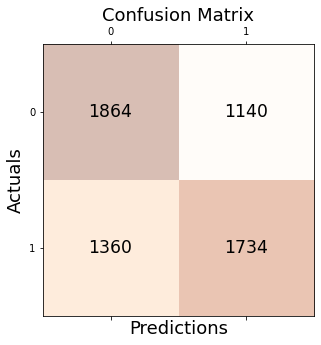

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true=predictions_xgboost["Target"], y_pred=predictions_xgboost["Predictions"])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('F1 Score XGBoost: %.3f' % f1_score(predictions_xgboost["Target"], predictions_xgboost["Predictions"]))
print('F1 Score RandomForest: %.3f' % f1_score(predictions_rf["Target"], predictions_rf["Predictions"]))

F1 Score XGBoost: 0.581
F1 Score RandomForest: 0.533


Si bien tenemos buenas métricas en ambos casos, podemos hacer una evaluación de ambos modelos para analizar un poco más en profundidad las métricas.
Como vimos anteriormente, sabemos que el modelo se encuentra balanceado, por lo que la métrica de precision en este caso no nos dice mucho acerca de la performance del modelo, sin embargo ambas métricas son altas.
Si comparamos las métricas de recall, vemos que el modelo de XGBoost supera al de RandomForest por casi 6 puntos porcentuales, lo cual es bastante alto, y esto nos indica que el modelo clasifica correctamente los valores positivos dentro de todos los positivos que hay en el modelo. Dicho de otra forma, el modelo tiene una probabilidad del 83% de acertar que el precio de la acción sube de todas las veces que el precio efectivamente subió. Si usamos este modelo para tener de input en futuras entradas en long, esto es, apostar a que el precio va a subir y ganar con esto, tendremos un nivel de confianza bastante alto y puede que la mayoria de nuestras operaciones sean satisfactorias.
Si evaluamos el accuracy del modelo, sabiendo que el mismo se encuentra balanceado, podemos ver que también el modelo de XGBoost supera al RandomForest por casi 2 puntos porcentuales, lo cual no es mucho, pero sirve de parámetro para saber que el modelo acierta correctamente las predicciones tanto cuando el precio sube como cuando el precio baja, lo cual puede ser de gran utilidad si también queremos ejecutar operaciones de short.
Por último vamos a ver la métrica de F1-Score que nos da una visión más general acerca de la performance del modelo, y podemos concluir finalmente que el modelo de XGBoost supera al de RandomForest en todas las métricas, incluida ésta última.

## Parte II - Regresión

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#Agregar modelo baseline en base a la introduccion de la notebook.
dt_regressor = DecisionTreeRegressor()
rf_regressor = RandomForestRegressor()
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')

In [ ]:
df_btc_reg = df_btc_bl[['close','precio_bl']]

In [ ]:
df_btc_reg_bl = df_btc_bl[['close','precio_bl']]

In [ ]:
df_btc_reg.head()

,close,precio_bl
Fecha,,
2019-01-10 11:00:00,3726.32,3973.477
2019-01-10 15:00:00,3573.78,3975.699
2019-01-10 19:00:00,3583.43,3976.583
2019-01-10 23:00:00,3579.76,3976.614
2019-01-11 03:00:00,3584.48,3953.864


In [ ]:
future_periods = 6
df_btc_reg['pred'] = df_btc_bl['close'].shift(-future_periods)

In [ ]:
df_btc_reg

,close,precio_bl,pred
Fecha,,,
2019-01-10 11:00:00,3726.32,3973.477,3598.72
2019-01-10 15:00:00,3573.78,3975.699,3605.88
2019-01-10 19:00:00,3583.43,3976.583,3578.85
2019-01-10 23:00:00,3579.76,3976.614,3594.88
2019-01-11 03:00:00,3584.48,3953.864,3571.74
...,...,...,...
2022-05-01 19:00:00,38306.63,38573.071,NaN
2022-05-01 23:00:00,38621.62,38474.309,NaN
2022-05-02 03:00:00,38926.11,38373.731,NaN


La variable que vamos a predecir es el valor de cierre de BTC, y utilizaremos el mismo dataset que usamos anteriormente, para poder predecir el precio de cierre del activo en 15 períodos posteriores.

In [ ]:
X = np.array(df_btc_reg.drop(['pred','precio_bl'], 1))[:-future_periods]
y = np.array(df_btc_reg[['pred','precio_bl']])[:-future_periods]

In [ ]:
X

array([[ 3726.32],
       [ 3573.78],
       [ 3583.43],
       ...,
       [37952.66],
       [38026.25],
       [37991.17]])

In [ ]:
y

array([[ 3598.72 ,  3973.477],
       [ 3605.88 ,  3975.699],
       [ 3578.85 ,  3976.583],
       ...,
       [38926.11 , 39116.902],
       [38711.88 , 38965.219],
       [38840.   , 38811.557]])

In [ ]:
##Se puede hacr un split random????
#los datos no quedan ordenados por el indice
#a continuación cambié el split para que no sea random, incorporé un random state para que los resultados se repliquen

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle = False, random_state = 0) #Hacemos un split sin randomizar los datos

In [ ]:
y_test[:,:1]

array([[50691.73],
       [50458.79],
       [49693.78],
       ...,
       [38926.11],
       [38711.88],
       [38840.  ]])

In [ ]:
dt_regressor.fit(X_train, y_train[:,:1])

DecisionTreeRegressor()

In [ ]:
#Cálculo de las métricas del modelo Baseline
from sklearn.metrics import r2_score
baseline_confidence = r2_score(y_test[:,:1], y_test[:,1:])

print("Baseline Model confidence: ", baseline_confidence)
print("MAE: {}".format(mean_absolute_error(y_test[:,:1], y_test[:,1:])))
print("RMSE: {}".format(math.sqrt(mean_squared_error(y_test[:,:1], y_test[:,1:]))))

Baseline Model confidence:  0.9091975427259703
MAE: 1871.8211632088519
RMSE: 2461.3372304876175


In [ ]:
dt_regressor.fit(X_train, y_train[:,:1])
dt_confidence = dt_regressor.score(X_test, y_test[:,:1])
y_pred = dt_regressor.predict(X_test)
print("Decision Tree confidence: ", dt_confidence)
print("MAE: {}".format(mean_absolute_error(y_test[:,:1], y_pred)))
print("RMSE: {}".format(math.sqrt(mean_squared_error(y_test[:,:1], y_pred))))

Decision Tree confidence:  0.8777628054999413
MAE: 2198.136649377593
RMSE: 2855.775129529148


In [ ]:
rf_regressor.fit(X_train, y_train[:,:1])
y_pred = rf_regressor.predict(X_test)
rf_confidence = rf_regressor.score(X_test, y_test[:,:1])
print("RandomForest confidence: ", rf_confidence)
print("MAE: {}".format(mean_absolute_error(y_test[:,:1], y_pred)))
print("RMSE: {}".format(math.sqrt(mean_squared_error(y_test[:,:1], y_pred))))

RandomForest confidence:  0.9158374251028438
MAE: 1850.2075259321261
RMSE: 2369.637026181677


In [ ]:
xgb_regressor.fit(X_train, y_train[:,:1])
y_pred_xgb = xgb_regressor.predict(X_test)
xgb_confidence = xgb_regressor.score(X_test, y_test[:,:1])
print("XGBoost confidence: ", xgb_confidence)
print("MAE: {}".format(mean_absolute_error(y_test[:,:1], y_pred_xgb)))
print("RMSE: {}".format(math.sqrt(mean_squared_error(y_test[:,:1], y_pred_xgb))))

XGBoost confidence:  0.9250991999242985
MAE: 1699.985825661307
RMSE: 2235.4530270884893


# Comparación de métricas para regresión:

Habiendo hecho una regresión de la base de datos a través del Baseline y  otros cuatro métodos distintos (Decision Tree, Random Forest y Extreme Gradient Boosting), obtuvimos de cada uno de ellos, diferentes métricas para medir el error de los valores obtenidos por regresión, a fin de hacer una comparativa del rendimiento de estos métodos y cuáles predicen mejor el comportamiento de la criptomoneda.

---
> **Modelo Baseline**


* Confidence =	0,9092
* MAE =	1871,8211
* RMSE = 	2461,337


> **Decision Tree**


* Confidence = 	0,8778
* MAE = 	2198,1366
* RMSE = 	2855,7751

>**Random Forest**

* Confidence = 	0,915837
* MAE = 	1850,2075
* RMSE = 	2369,637

>**XGBoost**

* Confidence =	0,9251
* MAE = 	1699,986
* RMSE = 	2235,453

Si comparamos las diferentes métricas para estimar la regresión, como el Error Absoluto Medio (MAE) o la Raiz del Error Cuadrático Medio (RMSE), teniendo como parametro base las metrícas obtenidas por el Baseline, se puede ver que los valores de error de todos los estimadores, nunca son inferiores a los que se obtuvieron del baseline. Si bien es notorio que algunos tienen un comportamiento muy bueno al performar la regresión, otros fracasan rotundamente. 
 
 A continuación, mostraremos cuánto es el porcentaje de diferencia entre las métricas del baseline y de los estimadores utilizados. Los mismos serán ordenados del mejor al peor 




1.   XGBoost
* MAE : -9,18%
* RMSE : -9,18% 
2.   Random Forest
* MAE : -1,15%
* RMSE : -3,73%
3.   Desition tree
*  MAE: 17,43%
* RMSE : 16,03%

Comparando estos estimadores, vemos que el XGBoost presenta un MAE y un RMSE 9% más bajo que el Baseline, por lo que es el que mejor regresión ha dado en comparación con los otros estimadores.

 RandomForest posee un Error Absoluto Medio y un RMSE de 1,15% y 3,7% menores que el baseline, por lo que sigue siendo superior al Baseline, pero no supera al XGBoost. 

 Finalmente el DesitionTree presenta metricas MAE y RMSE del 16% a 17% superiores a la del Baseline, por lo que no sería recomendable utilizar este estimador para la predicción de esta criptomoneda.



Otro parámetro también medido para cada uno de los estimadores es el coeficiente de determinación R^2 , a través de la función score. 

De igual manera que la comparación realizada con las otras métricas de regresión, se toma como parametro base el coeficiente de determinación R^2 obtenido del Baseline. Si lo comparamos con los R^2 obtenidos de los estimadores utilizados, posible ver que para XGBoost y Random Forest, los valores de R^2 son entre 0,73% y 1,75% superiores al score del Baseline. 

-----
Valores de R^2: 


1.   Baseline: 0,9092
2.   XGBoost: 0,9251
3.   RandomForest: 0,9158
4.   Desition Tree: 0,8778

Para el caso del DesitionTree, el coeficiente de determinación está por debajo del de Baseline, por lo que no sería de utilidad utilizar este estimador para tareas de regresión en criptomonedas.